In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("dragonheir/logistic-regression")
df = pd.read_csv(os.path.join(path, "Social_Network_Ads.csv"))

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vpthi\.cache\kagglehub\datasets\dragonheir\logistic-regression\versions\1


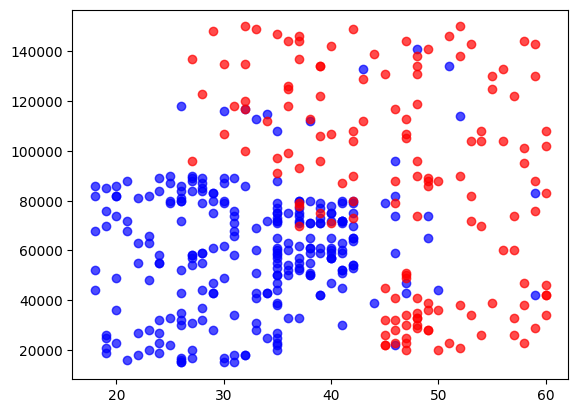

In [115]:
X_train= df[["Age", "EstimatedSalary"]].values
y_train= df["Purchased"].values

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='blue', label='Not Purchased (0)', alpha=0.7)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='red', label='Purchased (1)', alpha=0.7)


In [116]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1/(1 + np.exp(-z))

#As we all know, sigmoid function here roleplays as the maximum likelihood for our test example, say that sigmoid function predicted that it could fall around... 0<y^<1


In [117]:
# Since it is a multi parameter file, and not only that, we are not guaranteed that w is surely optimized. Therefore, we have to regularize our w.
# As we all know that overfitting and underfitting may exist in this database because the age is guaranteed up to 140k+ and the w may mimic that. So, we have to reduce our w in order to boost up our performance substantially.
def compute_cost(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    total_cost = 0
    reg_cost = 0
    ep = 1e-15
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb)
        total_cost += ((y[i] * np.log(f_wb_i + ep )) + (1-y[i]) * (np.log(1-f_wb_i + ep)))
    total_cost/=(-m)
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost *= (lambda_/(2*m))
    # res = total_cost + reg_cost
    return total_cost + reg_cost
# Determine whether that our cost function truly works. Let's see that out!
# As we all know that L function here stands for that, if our prediction scales past than 0.5, it means our prediction stands for 1 and vice versa.
# But, the y[i] may stand for 1 and 0. Say that our prediction is 0.57, which means it is a 1. But, on the other handk, the true y is 0.
# Therefore, it is closer to 1 rather than true y and it means it has to be penalized, a high penalty.
# But, in other words, how did the scientists come up with this?
# Well, say that, all we have learned in a log, it is a curve. Say that you have a log of (100), x = 100, and y would be 2.
# Therefore, it really mean that it is a descending value because it is a log. And vice versa if we decided to negative the value.
# What we're seeing is a log of postivity but when we add up negativity inside it, it would flip up. 
# And then, when we compare it with the original y, it would add up because it is different.
# Another example, if we have y = 1, and your prediction y is = 0.68
# Therefore, it will be a low penalty.
# Log loss formula: Say that y prediction could be 1, 1-y^i if y^i = 0. P(y^i*y^1 * (1-y^i) ^ 1-y^i)
# But products of many probabilities are tiny → take the log:
# Say it like that you have P(1 | x^i; w, b) = and you predicted that you have y^ of 0.7
# Therefore, it means that if my y stands for okay, and that means the probability of I am being correct is 70%.
# If my y^ is 0.3, it means that it has only 30% right.
# If my y label is 0, it is a vice versa.
# As we all have learned in mathematics, when we want to compute "and" in probability, we have to do P(x) * P(1-x) 
# And, since we have if, it does mean that it will be fused on top of the number, y prediction.
# Therefore, we have (y_^(^i)(y^i)) * ...
# But, we need to penalize it right? And adding up 1 and 0 won't do anything. So, we add up another which is a log loss to really "penalize" it.


In [118]:
# Now, onto Gradient Descent. Since, we have converted the cost function into a "bowl-shaped" because the log is also bowl-shaped.
def compute_gradient(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    dj_dw= np.zeros(n)
    dj_db = 0
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb)
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]   # add only to the j-th component
        dj_db += err
    reg_cost = 0    
    # dj_dw /= m
    # for j in range(n):
    #     reg_cost += (w)
    reg_cost = (w * lambda_)/m
    dj_dw += reg_cost
    dj_dw/= m
    dj_db/=m
    return dj_dw, dj_db
# Let me explain the intuition of the compute gradient.
# As we all know that the derivation can help us to navigate track onto finding the minimum value or maximum value.
# And, if we want to update our w by doing it, we can use w = w - alpha * partial derviation of the J function under woriginally. Since the j function needs to be found its minimum local point.
# And, our regularization friend acts as a way to reduce w substantially. But, you may wonder. Is it increasing?
# Correctly, it is increasing in terms of dj_dw, and cost function. But, if you take a deeper look on this, you may find it is decreasing.
# Why? Say that, our friend w may get decreased or increased if their slope points are somewhat surpassing the minimum local point right?
# But, sometimes it could lead to overfitting as it may reach the minimum local point.. but, keep getting somewhere else across the way? It's a funny term, isn't it?
# Therefore, regularization helps us with that by decreasing w or increasing w but at a reasonable term.
# So, how did scientists come up with this?
# Say that, you have a whole formula like this w1x1 + w2x2 + w3x1^2 + w4x2^2 + w5x1x2^2
# If we don't pick wisely at w, it may lead to overfit/underfit.
# Therefore, regularization is the right track for this. So, that means we have to reduce w at a reasonable for behind it.
# So, how can we come up with this? Of course, derivate it. Say that, if we manage to find the minimum of the formula: |w| sigma and lambda outside of it
# And, if we did try to navigate it, it means that, it will try to get the function of the regularization decreasing each time. Therefore, the whole sum vector of w is decreasing, only highlighting at some weights.



In [119]:
def gradient_descent(X, y, w_ini, b_ini, alpha, lambda_, iters):
    m, n = X.shape
    w = w_ini
    b = b_ini
    cost_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b, lambda_)
        cost_history.append(cost)
    return w, b, cost_history


In [128]:
np.random.seed(1)
# m, n = X_train.shape
w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.1
lambda_ = 0.1
iters = 10000
cost_history = []
w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, lambda_, iters)

# for i in range(len(cost_history)):
#     if (i%100 == 0):
#         print(cost_history[i])


# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
#         z_wb = sigmoid(np.dot(w, X[i]) + b)
        # Loop over each feature
#         for j in range(n): 
#             # Add the corresponding term to z_wb
#             z_wb += 
        
        # Add bias term 
#         z_wb += 
        
        # Calculate the prediction for this example
        f_wb = sigmoid(np.dot(w, X[i]) + b)

        # Apply the threshold
        if f_wb >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
        
    ### END CODE HERE ### 
    return p
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 64.250000


Train Accuracy: 64.250000
